# School Donation Analysis

**Author:** [Leah Nguyen](https://github.com/ndleah)

## Background Information

Founded in 2000 by a Bronx history teacher, DonorsChoose.org has raised $685 million for America's classrooms. Teachers at three-quarters of all the public schools in the U.S. have come to DonorsChoose.org to request what their students need, making DonorsChoose.org the leading platform for supporting public education.

To date, 3 million people and partners have funded 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn, the team at DonorsChoose.org needs to be able to connect donors with the projects that most inspire them.



## Aim

The project aims to analyze complex data sets of **DonorsChoose** and provide recommendations to teacher about the top donors that may be willing to donate for a particular category. 

This is done through analysis of historical data and listing the top donors with most number of contributions as a donor as well as the most amount donated. 

To help teachers write proposal for their projects, bag of words using natural language processing is generated in Python after data pre-processing for this particular requirement. 

The project also provides success rate for each category based on the donation amount received and the proect requirement cost which will help teachers select the best category according to their need.

## Dataset

Public data set can be found here:: https://www.kaggle.com/hanselhansel/donorschoose

## Requirement

In [1]:
!pip install chart_studio
!pip install matplotlib

## Import Libraries

In [2]:
cd C:\Users\LEAH NGUYEN\OneDrive\Desktop\GitHub\School-Donation-Analysis

C:\Users\LEAH NGUYEN\OneDrive\Desktop\GitHub\School-Donation-Analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chart_studio import plotly as pl
import plotly.offline as po
import cufflinks as cf
import datetime as dt
%matplotlib inline

In [4]:
po.init_notebook_mode(connected = True)
cf.go_offline()

## Load Dataset

In [5]:
donations = pd.read_csv('Donations.csv')

In [6]:
donors = pd.read_csv('Donors.csv')

C:\Users\LEAH NGUYEN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [7]:
projects = pd.read_csv('Projects.csv')

In [8]:
resources = pd.read_csv('Resources.csv')

In [9]:
schools = pd.read_csv('Schools.csv')

In [10]:
teachers = pd.read_csv('Teachers.csv')

## Exploratory Data Analysis

Data shape:

In [11]:
print('Shape of donations dataframe is: ', donations.shape)
print('Shape of donors dataframe is: ', donors.shape)
print('Shape of projects dataframe is: ', projects.shape)
print('Shape of resources dataframe is: ', resources.shape)
print('Shape of schools dataframe is: ', schools.shape)

Shape of donations dataframe is:  (4687884, 7)
Shape of donors dataframe is:  (2122640, 5)
Shape of projects dataframe is:  (1110017, 18)
Shape of resources dataframe is:  (7210448, 5)
Shape of schools dataframe is:  (72993, 9)


**Donations**

In [12]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [13]:
donations.describe()

,Donation Amount,Donor Cart Sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


**Donors**

In [14]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [15]:
donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,9475f1bf174bd5b77a3787dc882b67df,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


**Porjects**

In [16]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [17]:
projects.describe()

,Teacher Project Posted Sequence,Project Cost
count,1.110017e+06,1.110017e+06
mean,1.124050e+01,7.415240e+02
std,2.595475e+01,1.083256e+03
min,1.000000e+00,3.529000e+01
25%,1.000000e+00,3.351200e+02
50%,3.000000e+00,5.153500e+02
75%,9.000000e+00,8.675200e+02
max,4.970000e+02,2.557377e+05


**Resources**

In [18]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [19]:
resources.describe()

,Resource Quantity,Resource Unit Price
count,7.186149e+06,7.186138e+06
mean,2.816518e+00,5.341337e+01
std,8.866547e+00,1.863248e+02
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,7.260000e+00
50%,1.000000e+00,1.439000e+01
75%,2.000000e+00,3.640000e+01
max,4.125000e+03,9.708550e+04


**Schools**

In [20]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [21]:
schools.describe()

,School Percentage Free Lunch,School Zip
count,71852.000000,72993.000000
mean,58.556115,53382.093406
std,25.508378,29131.096568
min,0.000000,705.000000
25%,40.000000,29554.000000
50%,61.000000,53095.000000
75%,80.000000,78572.000000
max,100.000000,99950.000000


**Teachers**

In [22]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [23]:
teachers.describe()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
count,402900,402872,402900
unique,402900,6,4699
top,fde62602d34528c7cfd7adfeb8548a80,Mrs.,2015-09-13
freq,1,202142,2067


Create new data using current data set:

In [24]:
data = pd.merge(donations, projects, how = 'inner', on = 'Project ID')
data2 = pd.merge(data, donors, how = 'inner', on = 'Donor ID')
data3 = pd.merge(data2, schools, how = 'inner', on = 'School ID')
data4 = pd.merge(data3, teachers, how = 'inner', on = 'Teacher ID')
data4.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,School ID,Teacher ID,Teacher Project Posted Sequence,...,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
1,3cd4f1c5cfa0d495dadfead3153c936d,21aaadfba0becc3f052decf88cd31a75,1f4b5b6e68445c6c4a0509b3aca93f38,No,148.29,25,2017-03-30 01:34:18,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,11,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
2,8d9e1ec79b729185b7c61c6b57710b0d,1e20c3d1bce4a3def3a454868d29af30,1f4b5b6e68445c6c4a0509b3aca93f38,No,88.28,46,2017-10-19 17:59:52,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,19,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
3,9c5e7c5dd9a279e24147f101588c30fa,a2f24f363db1c03284a08ec1a863e467,1f4b5b6e68445c6c4a0509b3aca93f38,No,305.69,71,2018-01-25 17:01:41,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,21,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
4,b27c621c6cf61afa61e3a612193a11b2,821c83c092f4a97e416ced7747dde16c,1f4b5b6e68445c6c4a0509b3aca93f38,No,290.33,22,2016-12-22 15:51:26,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,9,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19


Inspect the columns:

In [25]:
a = data4.columns.values.tolist()
a

['Project ID',
 'Donation ID',
 'Donor ID',
 'Donation Included Optional Donation',
 'Donation Amount',
 'Donor Cart Sequence',
 'Donation Received Date',
 'School ID',
 'Teacher ID',
 'Teacher Project Posted Sequence',
 'Project Type',
 'Project Title',
 'Project Essay',
 'Project Short Description',
 'Project Need Statement',
 'Project Subject Category Tree',
 'Project Subject Subcategory Tree',
 'Project Grade Level Category',
 'Project Resource Category',
 'Project Cost',
 'Project Posted Date',
 'Project Expiration Date',
 'Project Current Status',
 'Project Fully Funded Date',
 'Donor City',
 'Donor State',
 'Donor Is Teacher',
 'Donor Zip',
 'School Name',
 'School Metro Type',
 'School Percentage Free Lunch',
 'School State',
 'School Zip',
 'School City',
 'School County',
 'School District',
 'Teacher Prefix',
 'Teacher First Project Posted Date']

## Basic Analysis

**Which 10 states have the most number of schools that opened projects to gather donations? Plot the data using bar plot.**

In [26]:
s = schools['School State'].value_counts(ascending = False).head(10)
s

California        8457
Texas             6485
New York          3819
Florida           3302
Illinois          3126
Michigan          2653
Ohio              2546
North Carolina    2543
Pennsylvania      2163
Georgia           2125
Name: School State, dtype: int64

In [27]:
s.iplot(kind = 'bar', xTitle = 'States', yTitle = 'Number of Schools', 
        title = 'Top 10 states with highest schools involved in projects')

**What are the top 10 states in which schools gathered most amount of AVERAGE donations for their projects?**

In [28]:
s2 = data4.groupby('School State')['Donation Amount'].mean().sort_values(ascending = True).head(10)
s2

School State
Idaho             42.147799
Delaware          45.506365
Missouri          49.333797
Indiana           52.031667
Tennessee         52.057198
Wisconsin         52.338506
Georgia           52.368144
South Carolina    53.122107
Minnesota         53.712664
Maine             53.795731
Name: Donation Amount, dtype: float64

In [29]:
s2.iplot(kind = 'bar', xTitle = 'States', yTitle = 'Average donation per project', 
        title = 'Top 10 States with maximum donation', colorscale='paired')

**Analyse the Maximum, Minimum, Mean, Median and 25 and 75% percentiles of Donations**

In [30]:
mean = np.mean(data['Donation Amount'].dropna())
median = np.median(data['Donation Amount'].dropna())
percentile = np.percentile(data['Donation Amount'].dropna(), [25,75])
minimum = data['Donation Amount'].dropna().min()
maximum = data['Donation Amount'].dropna().max()

print('mean donation amount in: ', np.round(mean, 2))
print('median donation amount in: ', median)
print('25% and 75% percentile donation amount in: ', percentile)
print('minimum donation amount in: ', minimum)
print('maximum donation amount in: ', maximum)

mean donation amount in:  61.03
median donation amount in:  25.0
25% and 75% percentile donation amount in:  [15. 50.]
minimum donation amount in:  0.01
maximum donation amount in:  60000.0


**Findings:** We can immediately observe from above statistics that:
* Our Donations Amount column have lots of outliers since mean is 60 whereas median is 25 which shows that there are plenty of outliers causing mean to rise
* We have 25th and 75th percentiles both below than mean. In other words although %75 percent of our data smaller than 50 we have a mean values which is 60.66 which is also a good indicator of outliers
* The maximum value is a huge outlier

**In which percent the data has points greater or smaller than the value shown in the x axis.**

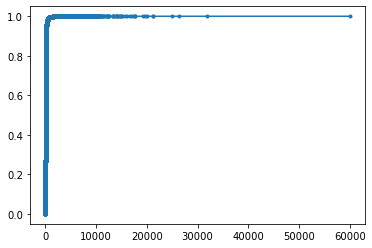

In [31]:
x = np.sort(data4["Donation Amount"].dropna())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker = '.')

**In which states there are more donations done by donors.**

In [32]:
s3 = data4.groupby('Donor State')['Donation ID'].count().sort_values(ascending = False).head(15)
s3

Donor State
California        693577
New York          350553
Texas             271348
Illinois          230350
Florida           229542
North Carolina    194465
other             184324
Pennsylvania      148752
Georgia           147897
Massachusetts     136845
Michigan          119337
Indiana           117470
Virginia          111740
New Jersey        109926
Ohio              107401
Name: Donation ID, dtype: int64

In [33]:
s3.iplot(kind = 'bar', xTitle = 'State', yTitle = 'Number of donations', title = 'Donation count', colorscale = 'paired')

Now, it is time for more advanced questions: 

- Is there a relationship between the number of projects offered and number of donations made by the donors? 
- Which states performing better in this case? 
- How many of them responding project requests below average and which states are performing best in terms of donations per project? 

In order to answer this question we must:

- **Step 1:** First get the number of projects per state and then number of donations made per state. 

- **Step 2:** Then we should merge this two and plot a scatter plot to visualize it.

In [34]:
s4 = schools['School State'].value_counts()
s5 = data4.groupby('Donor State')['Donation ID'].count()
df = pd.concat([s4, s5], axis=1, keys=['Projects', 'Donations'])

In [35]:
df = df.dropna()
df.head()

,Projects,Donations
California,8457.0,693577
Texas,6485.0,271348
New York,3819.0,350553
Florida,3302.0,229542
Illinois,3126.0,230350


In [36]:
df.iplot(kind = 'scatter', xTitle = 'Projects', 
         yTitle = 'Donations', title = 'Projects Vs. Donations', 
         symbol = 'x', colorscale = 'paired', mode = 'markers')

**Fit a linear model which will basically indicate the relationship between projects and donations.**

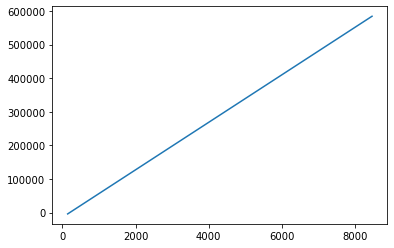

In [37]:
slope,intercept = np.polyfit(df.Projects, df.Donations, 1)
x = np.array([df.Projects.min(), df.Projects.max()])
y = slope*x + intercept
plt.plot(x, y)

Combine the plots

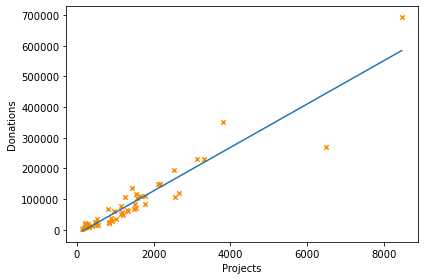

In [38]:
df.plot.scatter(x='Projects', y='Donations', marker = 'x', color = 'darkorange')
slope, intercept = np.polyfit(df.Projects, df.Donations,1)
x = np.array([df.Projects.min(), df.Projects.max()])
y = slope*x + intercept
plt.plot(x,y)
plt.tight_layout()
plt.margins(0.05)

**How mant different project types exists?**

In [39]:
s6 = data4['Project Type'].value_counts()
s6

Teacher-Led                 4532463
Professional Development      43217
Student-Led                   32400
Name: Project Type, dtype: int64

Plot the pie chart:

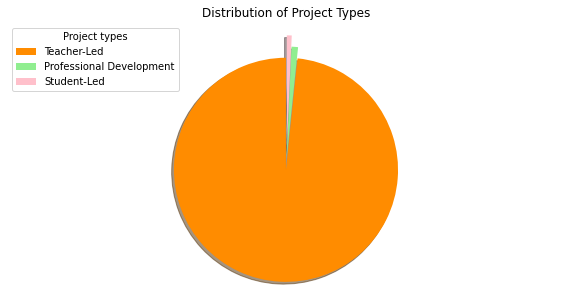

In [40]:
colors_list = ['darkorange', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0.1]
plt.pie(s6,  
        startangle=90,    
        shadow=True,       
        labels=None,         # turn off labels on pie chart
        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
        colors=colors_list,  # add custom colors
        explode=explode_list
        )
plt.title('Distribution of Project Types', y=1) 
plt.axis('equal') 
fig = plt.gcf()
fig.set_size_inches(10,5)
# add legend
plt.legend(labels=s6.index, loc='upper left', title = 'Project types') 

plt.show()

What is the total donation amount for each of them?

In [41]:
s7 = data4.groupby('Project Type')['Donation Amount'].sum().astype(int)
s7

Project Type
Professional Development      2474442
Student-Led                   2711059
Teacher-Led                 276046772
Name: Donation Amount, dtype: int32

Plot the pie chart:

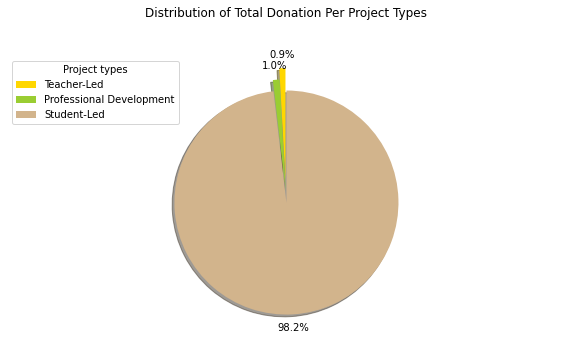

In [42]:
colors_list = ['gold', 'yellowgreen', 'tan']
explode_list = [0.1,0 , 0.1]
plt.pie(s7,  
        startangle=90,
        autopct='%1.1f%%',
        shadow=True,
        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
        colors=colors_list,  # add custom colors
        explode = explode_list
        )
plt.title('Distribution of Total Donation Per Project Types', y=1.12) 
plt.axis('equal') 
fig = plt.gcf()
fig.set_size_inches(10,5)
# add legend
plt.legend(labels=s6.index, loc='upper left', title = 'Project types') 
plt.axis('equal')
plt.show()

**How mant project subject category trees exists and Which ones attracted the most donations?**

In [43]:
data4['Project Subject Category Tree'].nunique()

51

In [44]:
s8 = data4.groupby('Project Subject Category Tree')['Donation Amount'].sum().astype(int).sort_values(ascending = False).head(15)
s8

Project Subject Category Tree
Literacy & Language                      59463406
Math & Science                           46378412
Literacy & Language, Math & Science      38882421
Music & The Arts                         17654172
Applied Learning                         11536010
Health & Sports                          10830324
Literacy & Language, Special Needs       10037973
Special Needs                             8669187
Applied Learning, Literacy & Language     7691442
Math & Science, Literacy & Language       6820461
History & Civics                          5612012
Literacy & Language, Music & The Arts     5038590
Applied Learning, Special Needs           5036123
History & Civics, Literacy & Language     4886560
Math & Science, Applied Learning          4645578
Name: Donation Amount, dtype: int32

In [45]:
s9 = s8/1000000
s9.iplot(kind = 'bar',xTitle = 'Porject sub category', yTitle = 'Donation amount (millions)',
        title = 'Donation amount by project subject', colorscale = 'paired')

## Time Series Analysis

**What is the mean time that takes a project to be fully funded after posted and how it varies between states?**

In [46]:
data4[['Project Posted Date', 'Project Fully Funded Date']].isnull().sum()

Project Posted Date               0
Project Fully Funded Date    437295
dtype: int64

In [47]:
data4[['Project Posted Date', 'Project Fully Funded Date']].head()

,Project Posted Date,Project Fully Funded Date
0,2016-05-13,2016-08-23
1,2017-03-18,2017-03-30
2,2017-10-18,2017-10-19
3,2017-11-27,2018-01-25
4,2016-09-05,2016-12-22


In [48]:
data4['Project Posted Date'] = pd.to_datetime(data4['Project Posted Date'])
data4['Project Fully Funded Date'] = pd.to_datetime(data4['Project Fully Funded Date'])
data4['Funding Time'] = data4['Project Fully Funded Date'] - data4['Project Posted Date']

##Inspect the dataframe
data4[['Project Posted Date', 'Project Fully Funded Date', 'Funding Time']].head()

,Project Posted Date,Project Fully Funded Date,Funding Time
0,2016-05-13,2016-08-23,102 days
1,2017-03-18,2017-03-30,12 days
2,2017-10-18,2017-10-19,1 days
3,2017-11-27,2018-01-25,59 days
4,2016-09-05,2016-12-22,108 days


Inspect if there is any null value in our new column 'Funding Time':

In [49]:
data4[['Project Posted Date', 'Project Fully Funded Date', 'Funding Time']].isnull().sum()

Project Posted Date               0
Project Fully Funded Date    437295
Funding Time                 437295
dtype: int64

In [50]:
data5 = data4[pd.notnull(data4['Funding Time'])]
data5[['Project Posted Date', 'Project Fully Funded Date', 'Funding Time']].isnull().sum()

Project Posted Date          0
Project Fully Funded Date    0
Funding Time                 0
dtype: int64

In [51]:
import datetime as dt
data5['Funding Time'] = data5['Funding Time'].dt.days
data5[['Project Posted Date', 'Project Fully Funded Date', 'Funding Time']].head()

,Project Posted Date,Project Fully Funded Date,Funding Time
0,2016-05-13,2016-08-23,102
1,2017-03-18,2017-03-30,12
2,2017-10-18,2017-10-19,1
3,2017-11-27,2018-01-25,59
4,2016-09-05,2016-12-22,108


In [52]:
# Calculate the mean time value for each group of the Project ID
overall_mean_time = data5.groupby('Project ID')['Funding Time'].mean()
# Calculate the mean for the overall funding time
output = overall_mean_time.mean()
output

32.171606457403584

**Average funding time for each state (by location)**

In [53]:
# Calculate the mean time value for each group of the Project ID
state_project_funding_time = data5.groupby(['School State', 'Project ID'])['Funding Time'].mean()
# Calculate the mean for the overall funding time
state_average_project_funding_time = state_project_funding_time.groupby('School State').mean()
state_average_project_funding_time.round(0)

School State
Alabama                 36.0
Alaska                  34.0
Arizona                 35.0
Arkansas                35.0
California              32.0
Colorado                31.0
Connecticut             32.0
Delaware                33.0
District of Columbia    26.0
Florida                 31.0
Georgia                 35.0
Hawaii                  27.0
Idaho                   31.0
Illinois                30.0
Indiana                 32.0
Iowa                    37.0
Kansas                  31.0
Kentucky                33.0
Louisiana               36.0
Maine                   35.0
Maryland                32.0
Massachusetts           32.0
Michigan                32.0
Minnesota               31.0
Mississippi             37.0
Missouri                31.0
Montana                 31.0
Nebraska                36.0
Nevada                  35.0
New Hampshire           31.0
New Jersey              32.0
New Mexico              35.0
New York                33.0
North Carolina          32.0
N

**Which states are the best and which are the worst performing in terms of this criteria ( mean project fully funded time)**

- States that fund projects earlier than others:

In [54]:
fast = state_average_project_funding_time.round(0)
fast[fast<32].sort_values().head(10)

School State
District of Columbia    26.0
Hawaii                  27.0
Wyoming                 29.0
Vermont                 30.0
Illinois                30.0
Oregon                  30.0
Pennsylvania            31.0
Oklahoma                31.0
New Hampshire           31.0
Colorado                31.0
Name: Funding Time, dtype: float64

In [55]:
fast_funding = fast[fast<32].sort_values().head(10)
fast_funding.iplot(kind = 'bar', xTitle = 'States', yTitle = 'Fully Funding Time (days)',
                   title = 'States that fund projects earlier than others', 
                   colorscale = 'paired')

- States that fund projects later than others:

In [56]:
slow = state_average_project_funding_time.round(0)
slow[slow>32].sort_values(ascending=False).head(10)

School State
Mississippi      37.0
Iowa             37.0
Nebraska         36.0
Louisiana        36.0
Utah             36.0
West Virginia    36.0
Alabama          36.0
North Dakota     35.0
New Mexico       35.0
Nevada           35.0
Name: Funding Time, dtype: float64

In [57]:
slow_funding = slow[slow>32].sort_values().head(10)
slow_funding.iplot(kind = 'bar', xTitle = 'States', yTitle = 'Fully Funding Time (days)',
                   title = 'States that fund projects earlier than others')